##Lib

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import os
import torchvision.utils as vutils


## STEP 1: Load Fashion MNIST dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizing to [-1, 1]
])

In [3]:
# Downloading and loading the Fashion MNIST dataset

fashion_dataset = datasets.FashionMNIST(root='fashion_mnist_data', train=True, transform=transform, download=True)
fashion_dataloader = DataLoader(fashion_dataset, batch_size=64, shuffle=True)


100%|██████████| 26421880/26421880 [00:01<00:00, 18015805.16it/s]


Extracting fashion_mnist_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 307994.97it/s]


Extracting fashion_mnist_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5565232.56it/s]


Extracting fashion_mnist_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23418955.52it/s]

Extracting fashion_mnist_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



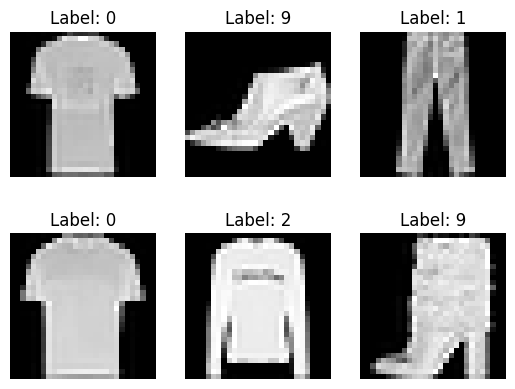

In [4]:
# Displaying some sample images to verify that the dataset is loaded correctly

sample_images, sample_labels = next(iter(fashion_dataloader))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {sample_labels[i]}')
    plt.axis('off')
plt.show()


## STEP 2: Define the Generator Network (with Dropout Layers)

In [5]:
# Defining the Generator Network (with Dropout Layers)

class DropoutGenerator(nn.Module):
    def __init__(self):
        super(DropoutGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(True),
            nn.Dropout(0.3),  # Adding dropout
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Dropout(0.3),  # Adding dropout
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Dropout(0.3),  # Adding dropout
            nn.Linear(1024, 28*28),
            nn.Tanh()  # Output values between [-1, 1]
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

dropout_generator = DropoutGenerator()

In [6]:
# Defining the Discriminator Network (unchanged)

class DropoutDiscriminator(nn.Module):
    def __init__(self):
        super(DropoutDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28*28))

dropout_discriminator = DropoutDiscriminator()

In [7]:
# Loss Functions and Optimizers

loss_function = nn.BCELoss()
gen_optimizer = torch.optim.Adam(dropout_generator.parameters(), lr=0.0002)
disc_optimizer = torch.optim.Adam(dropout_discriminator.parameters(), lr=0.0002)

In [8]:
# Training the GAN Model

num_epochs = 300  # Keeping a longer training duration
latent_dim = 100

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dropout_generator.to(device)
dropout_discriminator.to(device)


DropoutDiscriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

Epoch [1/300], d_loss: 0.08529055863618851, g_loss: 6.193295001983643
Epoch [2/300], d_loss: 0.0450742244720459, g_loss: 4.4784698486328125
Epoch [3/300], d_loss: 0.2904987633228302, g_loss: 7.976316452026367
Epoch [4/300], d_loss: 0.6311103105545044, g_loss: 3.5423479080200195
Epoch [5/300], d_loss: 0.2896670699119568, g_loss: 5.2319746017456055
Epoch [6/300], d_loss: 0.30007195472717285, g_loss: 3.895883083343506
Epoch [7/300], d_loss: 0.42628583312034607, g_loss: 3.1774654388427734
Epoch [8/300], d_loss: 0.8514915704727173, g_loss: 2.113325834274292
Epoch [9/300], d_loss: 0.3566983938217163, g_loss: 3.144589900970459
Epoch [10/300], d_loss: 0.5968880653381348, g_loss: 2.665473461151123


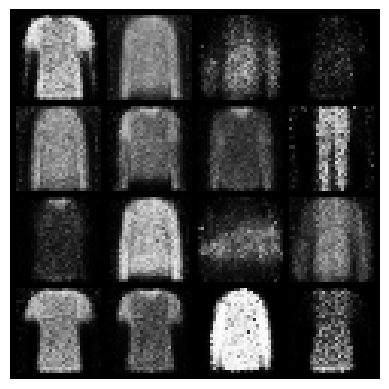

Epoch [11/300], d_loss: 0.6870458126068115, g_loss: 3.706160068511963
Epoch [12/300], d_loss: 0.40768468379974365, g_loss: 3.061206340789795
Epoch [13/300], d_loss: 0.6438096761703491, g_loss: 2.668008327484131
Epoch [14/300], d_loss: 0.4221280813217163, g_loss: 3.9844536781311035
Epoch [15/300], d_loss: 0.7192542552947998, g_loss: 2.6562106609344482
Epoch [16/300], d_loss: 0.3357396423816681, g_loss: 2.1045074462890625
Epoch [17/300], d_loss: 0.8627799153327942, g_loss: 2.516172170639038
Epoch [18/300], d_loss: 0.5515960454940796, g_loss: 1.7509515285491943
Epoch [19/300], d_loss: 0.4383825659751892, g_loss: 3.3645238876342773
Epoch [20/300], d_loss: 0.8573062419891357, g_loss: 2.4326441287994385


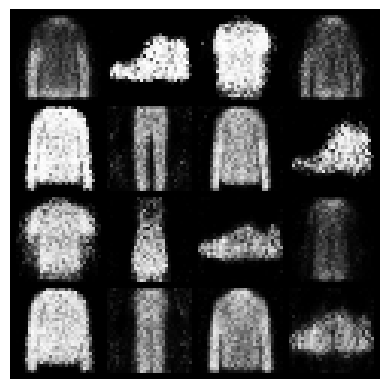

Epoch [21/300], d_loss: 0.6485839486122131, g_loss: 1.8752883672714233
Epoch [22/300], d_loss: 1.3407084941864014, g_loss: 2.590221881866455
Epoch [23/300], d_loss: 0.585433840751648, g_loss: 3.2328436374664307
Epoch [24/300], d_loss: 1.3958483934402466, g_loss: 3.1718597412109375
Epoch [25/300], d_loss: 0.37789005041122437, g_loss: 3.009042978286743
Epoch [26/300], d_loss: 0.788027286529541, g_loss: 2.459774971008301
Epoch [27/300], d_loss: 0.5090639591217041, g_loss: 2.527724504470825
Epoch [28/300], d_loss: 0.48493456840515137, g_loss: 3.3332343101501465
Epoch [29/300], d_loss: 0.7617505788803101, g_loss: 3.038724184036255
Epoch [30/300], d_loss: 0.570367157459259, g_loss: 2.8644988536834717


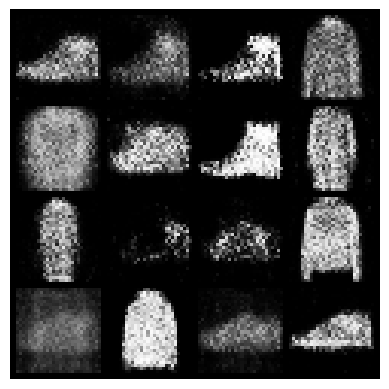

Epoch [31/300], d_loss: 0.9401604533195496, g_loss: 1.0442216396331787
Epoch [32/300], d_loss: 0.6411043405532837, g_loss: 2.567641258239746
Epoch [33/300], d_loss: 0.9103038907051086, g_loss: 1.965097427368164
Epoch [34/300], d_loss: 0.6456590890884399, g_loss: 2.455681800842285
Epoch [35/300], d_loss: 0.6059566736221313, g_loss: 2.473658323287964
Epoch [36/300], d_loss: 1.0313031673431396, g_loss: 1.97507643699646
Epoch [37/300], d_loss: 0.6231300234794617, g_loss: 2.0929882526397705
Epoch [38/300], d_loss: 0.8225616812705994, g_loss: 2.477382183074951
Epoch [39/300], d_loss: 1.0179641246795654, g_loss: 2.064295768737793
Epoch [40/300], d_loss: 0.43852370977401733, g_loss: 2.446770668029785


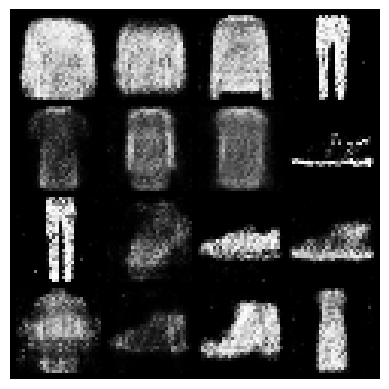

Epoch [41/300], d_loss: 0.933628261089325, g_loss: 1.4486873149871826
Epoch [42/300], d_loss: 0.9016882181167603, g_loss: 1.7028727531433105
Epoch [43/300], d_loss: 0.7242695093154907, g_loss: 2.1479392051696777
Epoch [44/300], d_loss: 0.9282666444778442, g_loss: 1.2638550996780396
Epoch [45/300], d_loss: 0.8719598054885864, g_loss: 1.6600699424743652
Epoch [46/300], d_loss: 0.9359511733055115, g_loss: 1.7159367799758911
Epoch [47/300], d_loss: 0.7831103801727295, g_loss: 1.3926666975021362
Epoch [48/300], d_loss: 0.5341014266014099, g_loss: 2.5301401615142822
Epoch [49/300], d_loss: 0.5116835236549377, g_loss: 2.967282295227051
Epoch [50/300], d_loss: 0.8936090469360352, g_loss: 2.439276695251465


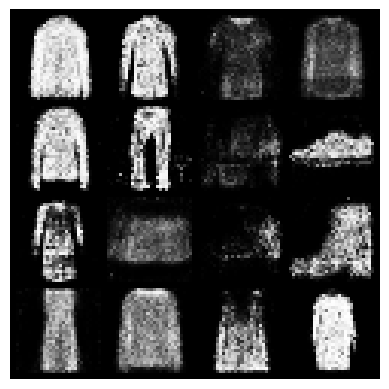

Epoch [51/300], d_loss: 1.0338318347930908, g_loss: 2.387695789337158
Epoch [52/300], d_loss: 0.8217451572418213, g_loss: 2.484631299972534
Epoch [53/300], d_loss: 0.8525234460830688, g_loss: 1.6871273517608643
Epoch [54/300], d_loss: 0.924750804901123, g_loss: 2.3851146697998047
Epoch [55/300], d_loss: 0.8160291910171509, g_loss: 1.4924571514129639
Epoch [56/300], d_loss: 1.1148087978363037, g_loss: 1.4298590421676636
Epoch [57/300], d_loss: 0.810539722442627, g_loss: 1.8340671062469482
Epoch [58/300], d_loss: 1.0006370544433594, g_loss: 1.8117648363113403
Epoch [59/300], d_loss: 0.6057167053222656, g_loss: 2.0589115619659424
Epoch [60/300], d_loss: 1.2541285753250122, g_loss: 1.3583135604858398


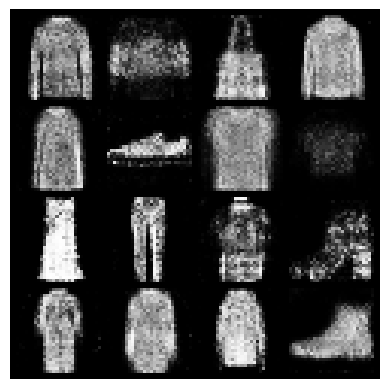

Epoch [61/300], d_loss: 1.25090491771698, g_loss: 1.198656439781189
Epoch [62/300], d_loss: 0.9149218201637268, g_loss: 1.40777587890625
Epoch [63/300], d_loss: 1.1761560440063477, g_loss: 1.4180710315704346
Epoch [64/300], d_loss: 0.511496901512146, g_loss: 1.933786153793335
Epoch [65/300], d_loss: 1.0311193466186523, g_loss: 1.9081783294677734
Epoch [66/300], d_loss: 0.692886233329773, g_loss: 1.3472635746002197
Epoch [67/300], d_loss: 0.8324782252311707, g_loss: 1.4949558973312378
Epoch [68/300], d_loss: 1.2467563152313232, g_loss: 1.3338754177093506
Epoch [69/300], d_loss: 1.3122265338897705, g_loss: 1.3694970607757568
Epoch [70/300], d_loss: 0.8795166015625, g_loss: 1.5416542291641235


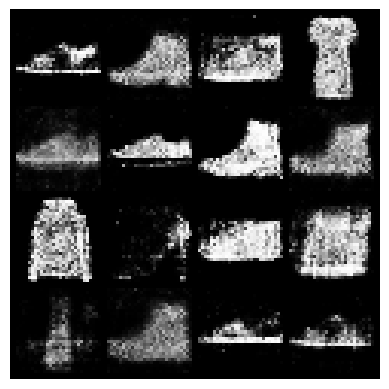

Epoch [71/300], d_loss: 0.9660980105400085, g_loss: 1.5815540552139282
Epoch [72/300], d_loss: 1.3126256465911865, g_loss: 1.1883338689804077
Epoch [73/300], d_loss: 1.1139395236968994, g_loss: 2.000217914581299
Epoch [74/300], d_loss: 1.1097557544708252, g_loss: 1.7146036624908447
Epoch [75/300], d_loss: 1.1859458684921265, g_loss: 1.7066216468811035
Epoch [76/300], d_loss: 1.573981523513794, g_loss: 0.8323165774345398
Epoch [77/300], d_loss: 0.7438996434211731, g_loss: 1.8849204778671265
Epoch [78/300], d_loss: 0.8273131847381592, g_loss: 1.7437738180160522
Epoch [79/300], d_loss: 1.059370994567871, g_loss: 1.4213337898254395
Epoch [80/300], d_loss: 0.7857294678688049, g_loss: 2.0765693187713623


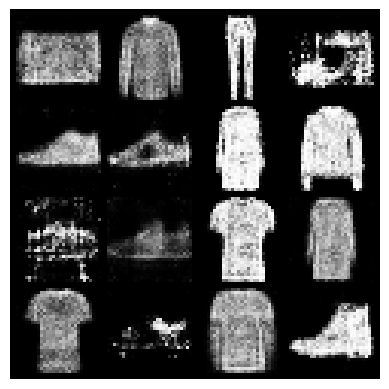

Epoch [81/300], d_loss: 0.9741960763931274, g_loss: 1.669627070426941
Epoch [82/300], d_loss: 1.2366034984588623, g_loss: 3.0581448078155518
Epoch [83/300], d_loss: 0.9963023066520691, g_loss: 1.212954044342041
Epoch [84/300], d_loss: 0.7499114871025085, g_loss: 1.4776051044464111
Epoch [85/300], d_loss: 1.3755017518997192, g_loss: 1.736063003540039
Epoch [86/300], d_loss: 0.8265790343284607, g_loss: 1.1979204416275024
Epoch [87/300], d_loss: 1.0559163093566895, g_loss: 2.002439022064209
Epoch [88/300], d_loss: 0.8665284514427185, g_loss: 1.6879582405090332
Epoch [89/300], d_loss: 0.6219481229782104, g_loss: 1.5499184131622314
Epoch [90/300], d_loss: 1.0570154190063477, g_loss: 1.795356273651123


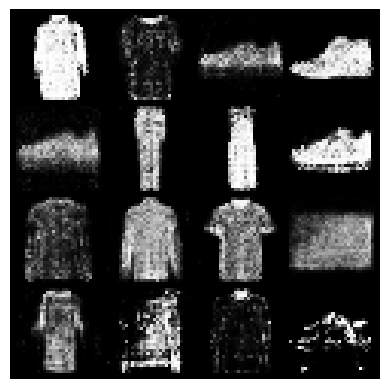

Epoch [91/300], d_loss: 1.496578574180603, g_loss: 1.4130103588104248
Epoch [92/300], d_loss: 1.0513408184051514, g_loss: 1.2568720579147339
Epoch [93/300], d_loss: 0.6966113448143005, g_loss: 1.5744423866271973
Epoch [94/300], d_loss: 1.1360307931900024, g_loss: 1.0964537858963013
Epoch [95/300], d_loss: 0.9105657339096069, g_loss: 2.0178604125976562
Epoch [96/300], d_loss: 0.9635922312736511, g_loss: 1.5497024059295654
Epoch [97/300], d_loss: 0.9555315971374512, g_loss: 1.6237969398498535
Epoch [98/300], d_loss: 1.3661984205245972, g_loss: 1.5530061721801758
Epoch [99/300], d_loss: 1.5050402879714966, g_loss: 1.8441247940063477
Epoch [100/300], d_loss: 1.3511565923690796, g_loss: 1.0295368432998657


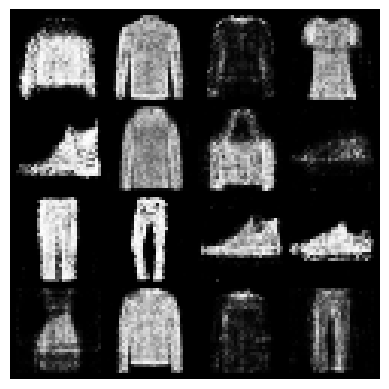

Epoch [101/300], d_loss: 0.7491540908813477, g_loss: 1.8539178371429443
Epoch [102/300], d_loss: 0.8581353425979614, g_loss: 1.6515896320343018
Epoch [103/300], d_loss: 1.0848873853683472, g_loss: 1.6529346704483032
Epoch [104/300], d_loss: 0.9040191173553467, g_loss: 1.3405287265777588
Epoch [105/300], d_loss: 1.1017773151397705, g_loss: 2.0806169509887695
Epoch [106/300], d_loss: 1.0004607439041138, g_loss: 1.6709315776824951
Epoch [107/300], d_loss: 0.7079715728759766, g_loss: 2.082366466522217
Epoch [108/300], d_loss: 0.973670482635498, g_loss: 1.0033836364746094
Epoch [109/300], d_loss: 0.6338180899620056, g_loss: 1.9057142734527588
Epoch [110/300], d_loss: 1.0965967178344727, g_loss: 1.4968546628952026


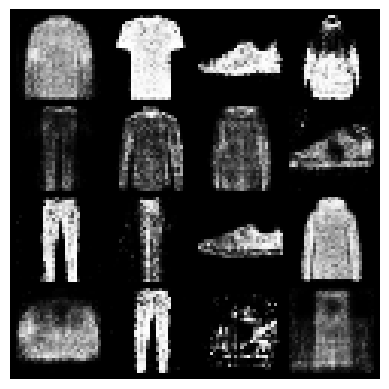

Epoch [111/300], d_loss: 0.828807532787323, g_loss: 1.9470806121826172
Epoch [112/300], d_loss: 0.9124853610992432, g_loss: 2.438753366470337
Epoch [113/300], d_loss: 1.2873406410217285, g_loss: 1.263803482055664
Epoch [114/300], d_loss: 1.140146255493164, g_loss: 1.3651483058929443
Epoch [115/300], d_loss: 1.113938331604004, g_loss: 1.185741662979126
Epoch [116/300], d_loss: 0.7515391707420349, g_loss: 1.3684762716293335
Epoch [117/300], d_loss: 1.0022245645523071, g_loss: 0.8746145963668823
Epoch [118/300], d_loss: 0.9478276371955872, g_loss: 1.8564664125442505
Epoch [119/300], d_loss: 1.1356163024902344, g_loss: 1.3939087390899658
Epoch [120/300], d_loss: 1.0999889373779297, g_loss: 1.235917568206787


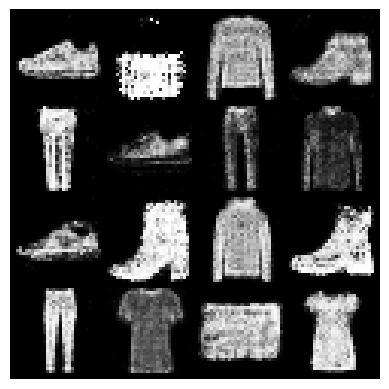

Epoch [121/300], d_loss: 1.1673693656921387, g_loss: 1.4233155250549316
Epoch [122/300], d_loss: 0.9143510460853577, g_loss: 1.4767874479293823
Epoch [123/300], d_loss: 1.4401170015335083, g_loss: 0.8566628694534302
Epoch [124/300], d_loss: 1.2315633296966553, g_loss: 0.9414122104644775
Epoch [125/300], d_loss: 0.9793293476104736, g_loss: 1.8973597288131714
Epoch [126/300], d_loss: 1.0335665941238403, g_loss: 1.6909257173538208
Epoch [127/300], d_loss: 1.1969269514083862, g_loss: 1.1477961540222168
Epoch [128/300], d_loss: 1.0978543758392334, g_loss: 1.1780099868774414
Epoch [129/300], d_loss: 0.9313481450080872, g_loss: 1.2812827825546265
Epoch [130/300], d_loss: 1.3140941858291626, g_loss: 1.1017804145812988


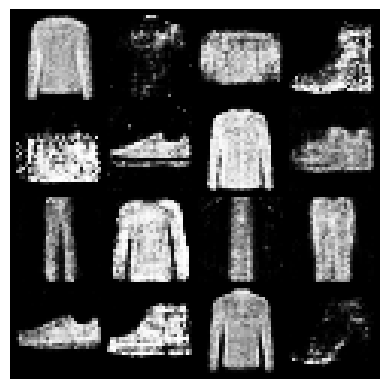

Epoch [131/300], d_loss: 1.2856180667877197, g_loss: 0.9826199412345886
Epoch [132/300], d_loss: 1.6250563859939575, g_loss: 1.3702493906021118
Epoch [133/300], d_loss: 0.9420119524002075, g_loss: 1.5916526317596436
Epoch [134/300], d_loss: 1.474594235420227, g_loss: 1.1230205297470093
Epoch [135/300], d_loss: 1.1684577465057373, g_loss: 1.0182089805603027
Epoch [136/300], d_loss: 1.2488209009170532, g_loss: 1.277280569076538
Epoch [137/300], d_loss: 1.2312082052230835, g_loss: 1.0467500686645508
Epoch [138/300], d_loss: 0.9064950942993164, g_loss: 1.2790560722351074
Epoch [139/300], d_loss: 1.005192518234253, g_loss: 1.8756954669952393
Epoch [140/300], d_loss: 0.8071793913841248, g_loss: 1.4441132545471191


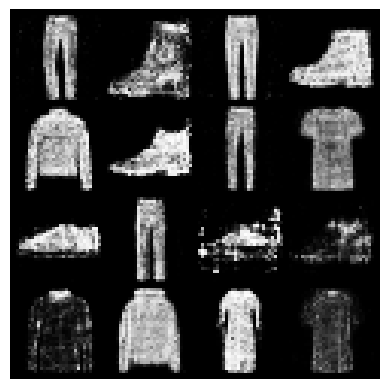

Epoch [141/300], d_loss: 1.2624249458312988, g_loss: 1.2016661167144775
Epoch [142/300], d_loss: 1.1704189777374268, g_loss: 1.1768338680267334
Epoch [143/300], d_loss: 0.847191572189331, g_loss: 1.5066635608673096
Epoch [144/300], d_loss: 0.8520666360855103, g_loss: 1.2660419940948486
Epoch [145/300], d_loss: 0.9802157282829285, g_loss: 1.0388097763061523
Epoch [146/300], d_loss: 0.6875159740447998, g_loss: 1.8646867275238037
Epoch [147/300], d_loss: 1.3273903131484985, g_loss: 1.2423291206359863
Epoch [148/300], d_loss: 1.1001592874526978, g_loss: 0.9022442698478699
Epoch [149/300], d_loss: 1.008705735206604, g_loss: 1.5855627059936523
Epoch [150/300], d_loss: 0.8223960399627686, g_loss: 1.1648285388946533


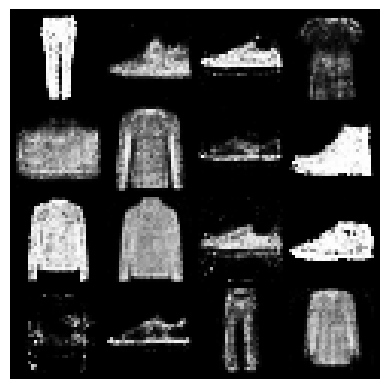

Epoch [151/300], d_loss: 1.155643105506897, g_loss: 1.5157177448272705
Epoch [152/300], d_loss: 0.9564548134803772, g_loss: 0.9480823278427124
Epoch [153/300], d_loss: 1.0683600902557373, g_loss: 1.2997623682022095
Epoch [154/300], d_loss: 1.069509744644165, g_loss: 1.0211225748062134
Epoch [155/300], d_loss: 1.1508272886276245, g_loss: 1.0690468549728394
Epoch [156/300], d_loss: 1.414564847946167, g_loss: 1.1443876028060913
Epoch [157/300], d_loss: 0.7643530964851379, g_loss: 1.1839021444320679
Epoch [158/300], d_loss: 1.3580703735351562, g_loss: 0.7715448141098022
Epoch [159/300], d_loss: 1.1264030933380127, g_loss: 1.2029870748519897
Epoch [160/300], d_loss: 1.2967522144317627, g_loss: 1.121993899345398


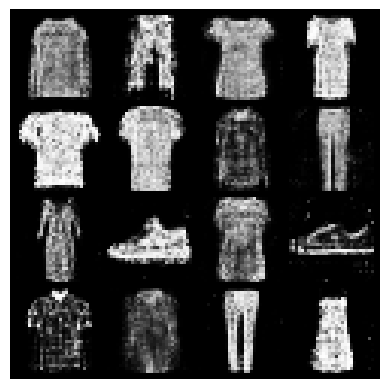

Epoch [161/300], d_loss: 1.230541467666626, g_loss: 1.4946986436843872
Epoch [162/300], d_loss: 1.039114236831665, g_loss: 1.1933867931365967
Epoch [163/300], d_loss: 0.9372442960739136, g_loss: 1.2735178470611572
Epoch [164/300], d_loss: 1.3243721723556519, g_loss: 1.194414734840393
Epoch [165/300], d_loss: 0.8215517997741699, g_loss: 1.1384385824203491
Epoch [166/300], d_loss: 1.123407006263733, g_loss: 1.0144704580307007
Epoch [167/300], d_loss: 1.040289282798767, g_loss: 1.882724404335022
Epoch [168/300], d_loss: 0.9343977570533752, g_loss: 1.3632776737213135
Epoch [169/300], d_loss: 0.9540156722068787, g_loss: 1.7709553241729736
Epoch [170/300], d_loss: 1.1412956714630127, g_loss: 1.548136591911316


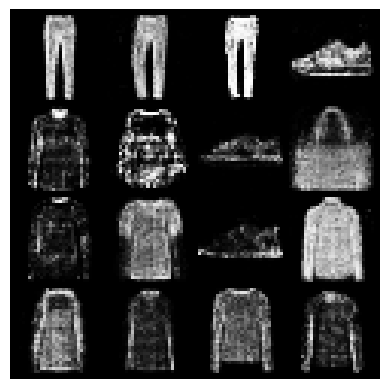

Epoch [171/300], d_loss: 0.8615609407424927, g_loss: 1.5540549755096436
Epoch [172/300], d_loss: 1.0230730772018433, g_loss: 1.3701726198196411
Epoch [173/300], d_loss: 1.1189998388290405, g_loss: 1.5516259670257568
Epoch [174/300], d_loss: 1.1900150775909424, g_loss: 0.9209561347961426
Epoch [175/300], d_loss: 1.2998881340026855, g_loss: 1.4562411308288574
Epoch [176/300], d_loss: 1.2187459468841553, g_loss: 1.2309342622756958
Epoch [177/300], d_loss: 1.2854732275009155, g_loss: 1.0764051675796509
Epoch [178/300], d_loss: 0.8022798895835876, g_loss: 1.079972743988037
Epoch [179/300], d_loss: 1.1325433254241943, g_loss: 1.2435917854309082
Epoch [180/300], d_loss: 1.023688793182373, g_loss: 1.3429303169250488


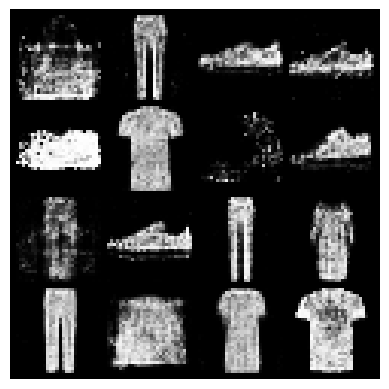

Epoch [181/300], d_loss: 1.1166009902954102, g_loss: 1.0956522226333618
Epoch [182/300], d_loss: 0.961699366569519, g_loss: 1.28678297996521
Epoch [183/300], d_loss: 1.572335958480835, g_loss: 0.7942405343055725
Epoch [184/300], d_loss: 0.7150846123695374, g_loss: 1.6229701042175293
Epoch [185/300], d_loss: 1.1889557838439941, g_loss: 1.36643648147583
Epoch [186/300], d_loss: 0.8107594847679138, g_loss: 1.9057414531707764
Epoch [187/300], d_loss: 1.0272626876831055, g_loss: 1.2390596866607666
Epoch [188/300], d_loss: 0.9025661945343018, g_loss: 1.1368141174316406
Epoch [189/300], d_loss: 1.120235562324524, g_loss: 1.311732292175293
Epoch [190/300], d_loss: 0.9099938273429871, g_loss: 1.2226223945617676


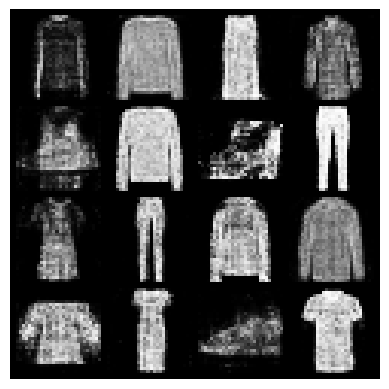

Epoch [191/300], d_loss: 0.9028931260108948, g_loss: 1.112565517425537
Epoch [192/300], d_loss: 0.9025647640228271, g_loss: 1.2153573036193848
Epoch [193/300], d_loss: 1.0316959619522095, g_loss: 1.2893433570861816
Epoch [194/300], d_loss: 1.0212523937225342, g_loss: 1.605898380279541
Epoch [195/300], d_loss: 1.7381744384765625, g_loss: 0.9862066507339478
Epoch [196/300], d_loss: 1.4619200229644775, g_loss: 1.2161080837249756
Epoch [197/300], d_loss: 0.991270899772644, g_loss: 1.2281122207641602
Epoch [198/300], d_loss: 0.8120095729827881, g_loss: 1.4845390319824219
Epoch [199/300], d_loss: 0.9906293749809265, g_loss: 1.3643686771392822
Epoch [200/300], d_loss: 1.2641615867614746, g_loss: 1.3353197574615479


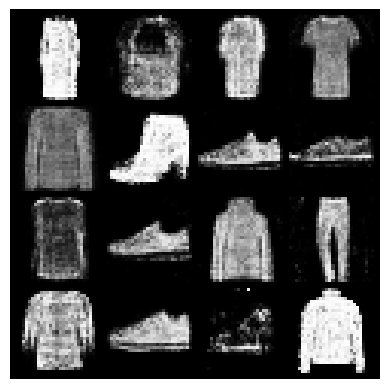

Epoch [201/300], d_loss: 1.1959223747253418, g_loss: 1.0761269330978394
Epoch [202/300], d_loss: 1.405604600906372, g_loss: 1.0298140048980713
Epoch [203/300], d_loss: 0.8669753074645996, g_loss: 1.6238582134246826
Epoch [204/300], d_loss: 1.27461576461792, g_loss: 1.075667142868042
Epoch [205/300], d_loss: 1.2038205862045288, g_loss: 1.4454915523529053
Epoch [206/300], d_loss: 0.6757569909095764, g_loss: 1.509579062461853
Epoch [207/300], d_loss: 1.817370057106018, g_loss: 1.4827046394348145
Epoch [208/300], d_loss: 0.9322072267532349, g_loss: 1.243921160697937
Epoch [209/300], d_loss: 0.750046968460083, g_loss: 1.0956006050109863
Epoch [210/300], d_loss: 1.1518034934997559, g_loss: 1.348684549331665


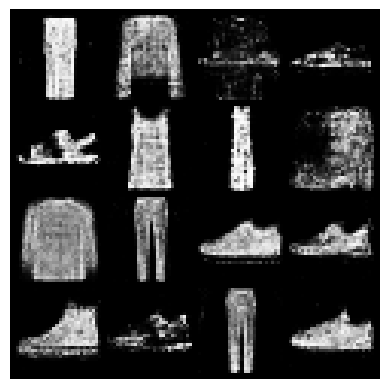

Epoch [211/300], d_loss: 1.3890762329101562, g_loss: 1.2551449537277222
Epoch [212/300], d_loss: 1.0884976387023926, g_loss: 1.1398425102233887
Epoch [213/300], d_loss: 1.2000818252563477, g_loss: 1.9903895854949951
Epoch [214/300], d_loss: 0.8548260927200317, g_loss: 2.042346239089966
Epoch [215/300], d_loss: 0.7806562185287476, g_loss: 1.5985636711120605
Epoch [216/300], d_loss: 1.0619750022888184, g_loss: 1.6099495887756348
Epoch [217/300], d_loss: 1.335740327835083, g_loss: 0.9291552901268005
Epoch [218/300], d_loss: 0.8595036268234253, g_loss: 1.485720157623291
Epoch [219/300], d_loss: 0.8776074647903442, g_loss: 1.6619925498962402
Epoch [220/300], d_loss: 0.8256475329399109, g_loss: 1.4676376581192017


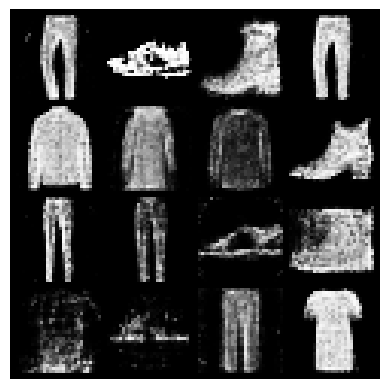

Epoch [221/300], d_loss: 1.327883243560791, g_loss: 1.114999532699585
Epoch [222/300], d_loss: 1.0659959316253662, g_loss: 1.7202110290527344
Epoch [223/300], d_loss: 0.8820364475250244, g_loss: 1.311180591583252
Epoch [224/300], d_loss: 0.7466354370117188, g_loss: 1.2422224283218384
Epoch [225/300], d_loss: 0.9194891452789307, g_loss: 1.1970360279083252
Epoch [226/300], d_loss: 1.0606876611709595, g_loss: 1.1123242378234863
Epoch [227/300], d_loss: 1.1333107948303223, g_loss: 1.0335979461669922
Epoch [228/300], d_loss: 0.9696751832962036, g_loss: 1.973830223083496
Epoch [229/300], d_loss: 0.6655133962631226, g_loss: 1.027625560760498
Epoch [230/300], d_loss: 1.052640438079834, g_loss: 1.1932471990585327


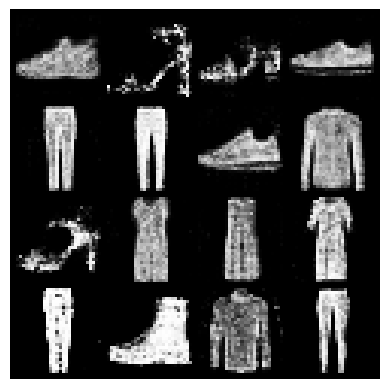

Epoch [231/300], d_loss: 1.0717544555664062, g_loss: 1.6055936813354492
Epoch [232/300], d_loss: 0.8773123025894165, g_loss: 1.8667590618133545
Epoch [233/300], d_loss: 1.0923120975494385, g_loss: 1.1543327569961548
Epoch [234/300], d_loss: 1.3927825689315796, g_loss: 0.6966724395751953
Epoch [235/300], d_loss: 0.7571427822113037, g_loss: 1.4497873783111572
Epoch [236/300], d_loss: 0.6078519821166992, g_loss: 1.764803409576416
Epoch [237/300], d_loss: 1.0017518997192383, g_loss: 1.2535853385925293
Epoch [238/300], d_loss: 1.0340919494628906, g_loss: 2.0870790481567383
Epoch [239/300], d_loss: 1.196685552597046, g_loss: 1.1480319499969482
Epoch [240/300], d_loss: 1.0366230010986328, g_loss: 1.338660717010498


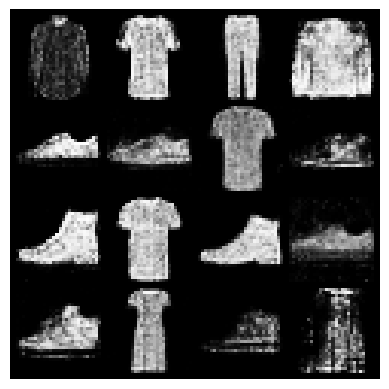

Epoch [241/300], d_loss: 0.8851439952850342, g_loss: 1.306786060333252
Epoch [242/300], d_loss: 1.1740999221801758, g_loss: 1.0050346851348877
Epoch [243/300], d_loss: 0.8812133073806763, g_loss: 1.1899502277374268
Epoch [244/300], d_loss: 1.0002264976501465, g_loss: 0.9402666687965393
Epoch [245/300], d_loss: 1.1271336078643799, g_loss: 1.3538814783096313
Epoch [246/300], d_loss: 1.224216341972351, g_loss: 1.2578179836273193
Epoch [247/300], d_loss: 0.9450849294662476, g_loss: 1.2913432121276855
Epoch [248/300], d_loss: 1.6838481426239014, g_loss: 1.333970308303833
Epoch [249/300], d_loss: 0.9933507442474365, g_loss: 1.2279150485992432
Epoch [250/300], d_loss: 1.0691196918487549, g_loss: 1.6343879699707031


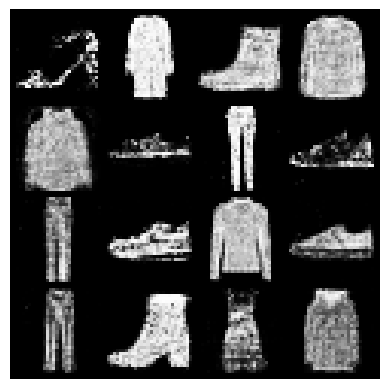

Epoch [251/300], d_loss: 1.1903681755065918, g_loss: 0.7906067371368408
Epoch [252/300], d_loss: 0.9203984141349792, g_loss: 1.0061792135238647
Epoch [253/300], d_loss: 0.7818098068237305, g_loss: 2.0623722076416016
Epoch [254/300], d_loss: 1.507053256034851, g_loss: 1.6448845863342285
Epoch [255/300], d_loss: 0.8124293684959412, g_loss: 1.612017035484314
Epoch [256/300], d_loss: 0.9686760306358337, g_loss: 1.0252974033355713
Epoch [257/300], d_loss: 1.0448213815689087, g_loss: 2.0813865661621094
Epoch [258/300], d_loss: 1.2798144817352295, g_loss: 1.2128326892852783
Epoch [259/300], d_loss: 1.0644259452819824, g_loss: 1.1048156023025513
Epoch [260/300], d_loss: 0.6601277589797974, g_loss: 1.451848030090332


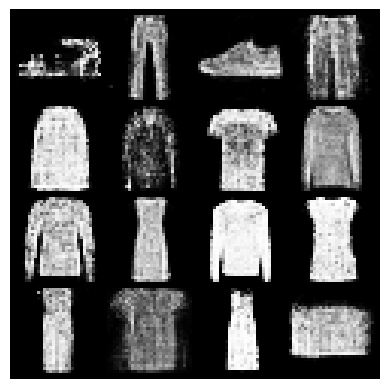

Epoch [261/300], d_loss: 1.062577247619629, g_loss: 0.9754229784011841
Epoch [262/300], d_loss: 1.0269834995269775, g_loss: 1.263649821281433
Epoch [263/300], d_loss: 1.0997560024261475, g_loss: 1.4494209289550781
Epoch [264/300], d_loss: 0.8282090425491333, g_loss: 1.4881830215454102
Epoch [265/300], d_loss: 0.7293698191642761, g_loss: 1.2076287269592285
Epoch [266/300], d_loss: 0.9529451131820679, g_loss: 1.247820258140564
Epoch [267/300], d_loss: 0.8284342288970947, g_loss: 1.6162023544311523
Epoch [268/300], d_loss: 0.7541072964668274, g_loss: 1.4126626253128052
Epoch [269/300], d_loss: 0.5919952392578125, g_loss: 1.9087467193603516
Epoch [270/300], d_loss: 0.8457009196281433, g_loss: 1.32168710231781


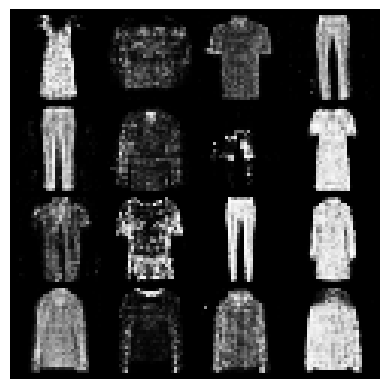

Epoch [271/300], d_loss: 0.9330980777740479, g_loss: 1.2730332612991333
Epoch [272/300], d_loss: 1.0201647281646729, g_loss: 1.2770771980285645
Epoch [273/300], d_loss: 1.0191549062728882, g_loss: 1.3910833597183228
Epoch [274/300], d_loss: 1.0386717319488525, g_loss: 0.9319449067115784
Epoch [275/300], d_loss: 0.939109206199646, g_loss: 1.292426347732544
Epoch [276/300], d_loss: 0.7971829771995544, g_loss: 1.7353225946426392
Epoch [277/300], d_loss: 0.9743751287460327, g_loss: 1.4346897602081299
Epoch [278/300], d_loss: 0.7514163255691528, g_loss: 1.8303860425949097
Epoch [279/300], d_loss: 1.126699686050415, g_loss: 1.6492037773132324
Epoch [280/300], d_loss: 1.0946273803710938, g_loss: 1.1510074138641357


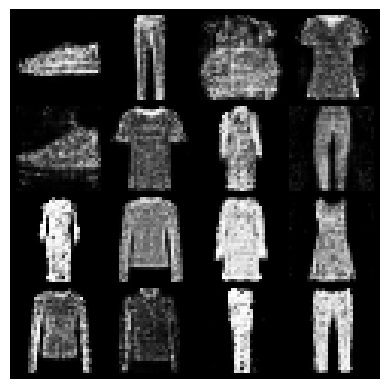

Epoch [281/300], d_loss: 0.7691478729248047, g_loss: 1.5534484386444092
Epoch [282/300], d_loss: 0.7778173089027405, g_loss: 1.8302844762802124
Epoch [283/300], d_loss: 0.8453359603881836, g_loss: 1.7750353813171387
Epoch [284/300], d_loss: 0.6803037524223328, g_loss: 1.3780165910720825
Epoch [285/300], d_loss: 0.836540162563324, g_loss: 1.6531689167022705
Epoch [286/300], d_loss: 0.7262389659881592, g_loss: 1.8548808097839355
Epoch [287/300], d_loss: 0.6421239376068115, g_loss: 1.7336595058441162
Epoch [288/300], d_loss: 0.8748965263366699, g_loss: 1.6096222400665283
Epoch [289/300], d_loss: 0.9239823222160339, g_loss: 2.107105016708374
Epoch [290/300], d_loss: 0.6828818321228027, g_loss: 2.139782190322876


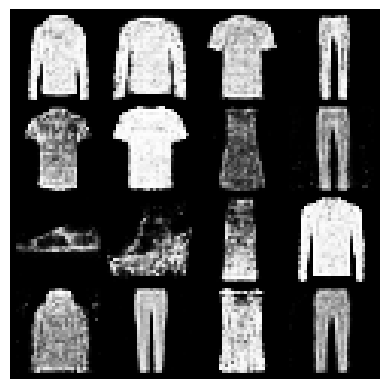

Epoch [291/300], d_loss: 1.0003571510314941, g_loss: 1.7251369953155518
Epoch [292/300], d_loss: 1.095568299293518, g_loss: 1.2379868030548096
Epoch [293/300], d_loss: 1.1103883981704712, g_loss: 2.2007126808166504
Epoch [294/300], d_loss: 0.8267198204994202, g_loss: 1.6041033267974854
Epoch [295/300], d_loss: 0.8341347575187683, g_loss: 1.3237265348434448
Epoch [296/300], d_loss: 1.0556310415267944, g_loss: 1.526235580444336
Epoch [297/300], d_loss: 1.206173300743103, g_loss: 1.3240858316421509
Epoch [298/300], d_loss: 1.0944913625717163, g_loss: 1.5039677619934082
Epoch [299/300], d_loss: 1.021727442741394, g_loss: 1.643676996231079
Epoch [300/300], d_loss: 0.724673867225647, g_loss: 1.8201611042022705


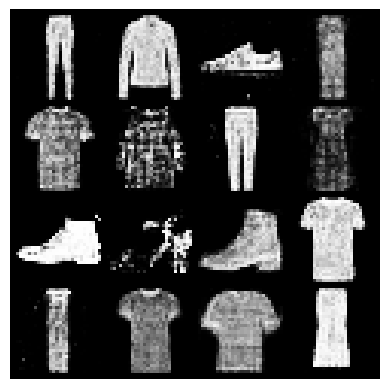

In [10]:
# Training loop

for epoch in range(num_epochs):
    for real_imgs, _ in fashion_dataloader:
        # Move real images to the device
        real_imgs = real_imgs.to(device)

        # Labels for real and fake images
        real_labels = torch.ones(real_imgs.size(0), 1).to(device)
        fake_labels = torch.zeros(real_imgs.size(0), 1).to(device)

        # Train Discriminator
        outputs = dropout_discriminator(real_imgs)
        d_loss_real = loss_function(outputs, real_labels)

        noise_vector = torch.randn(real_imgs.size(0), latent_dim).to(device)
        fake_imgs = dropout_generator(noise_vector)
        outputs = dropout_discriminator(fake_imgs.detach())
        d_loss_fake = loss_function(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        disc_optimizer.zero_grad()
        d_loss.backward()
        disc_optimizer.step()

        # Train Generator
        noise_vector = torch.randn(real_imgs.size(0), latent_dim).to(device)
        fake_imgs = dropout_generator(noise_vector)
        outputs = dropout_discriminator(fake_imgs)

        g_loss = loss_function(outputs, real_labels)
        gen_optimizer.zero_grad()
        g_loss.backward()
        gen_optimizer.step()

    # Logging losses
    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')

    # Display generated images every few epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            noise_vector = torch.randn(16, latent_dim).to(device)
            fake_imgs = dropout_generator(noise_vector).cpu()
            fake_imgs = fake_imgs * 0.5 + 0.5  # Unnormalize images for display
            grid_img = torchvision.utils.make_grid(fake_imgs, nrow=4)
            plt.imshow(grid_img.permute(1, 2, 0))
            plt.axis('off')
            plt.show()

## STEP 3: Generate and Save Samples

In [12]:
# Directory to save images

output_dir = 'gan_samples'
os.makedirs(output_dir, exist_ok=True)

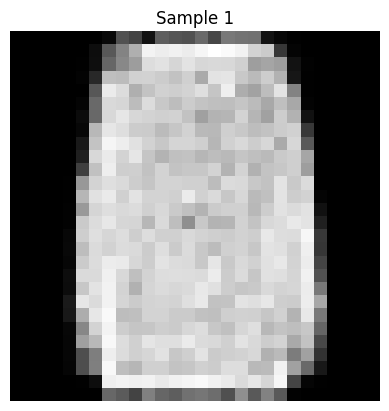

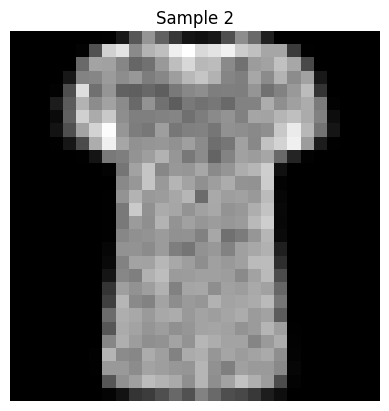

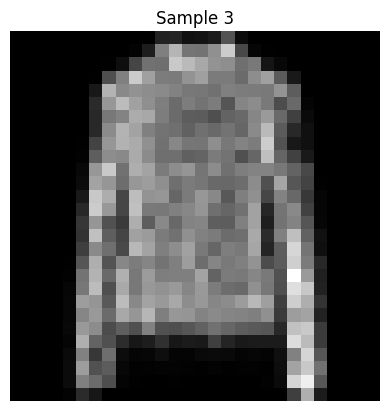

In [13]:
# Generating samples function
def save_samples(generator, noise_dim, num_samples=3):
    generator.eval()  # Setting generator to evaluation mode
    with torch.no_grad():  # No need to compute gradients
        # Generate noise
        noise = torch.randn(num_samples, noise_dim).to(device)  # Noise for fully connected DropoutGenerator

        # Generating fake images
        fake_images = generator(noise).cpu()

        # Unnormalize images to [0, 1] range for visualization
        fake_images = fake_images * 0.5 + 0.5

        # Save each generated image
        for i in range(num_samples):
            vutils.save_image(fake_images[i], f'{output_dir}/sample_{i + 1}.png')

        # To display the generated images
        for i in range(num_samples):
            img = fake_images[i].squeeze().numpy()  # Use squeeze to remove single-dimensional entries
            plt.imshow(img, cmap='gray')
            plt.title(f'Sample {i + 1}')
            plt.axis('off')
            plt.show()

# Use the dropout-based generator here (DropoutGenerator)
save_samples(dropout_generator, noise_dim=100, num_samples=3)


## STEP 4: Save and Load Model Weights

In [14]:
# Directory to save model weights
model_dir = 'gan_model_weights'
os.makedirs(model_dir, exist_ok=True)

In [15]:
# Saving the generator and discriminator weights

torch.save(dropout_generator.state_dict(), os.path.join(model_dir, 'generator.pth'))
torch.save(dropout_discriminator.state_dict(), os.path.join(model_dir, 'discriminator.pth'))


In [16]:
print(f"Model weights saved in the '{model_dir}' folder.")

Model weights saved in the 'gan_model_weights' folder.


In [17]:
# Loading the generator and discriminator weights
loaded_generator = DropoutGenerator()  # Using DropoutGenerator to match the saved model
loaded_discriminator = DropoutDiscriminator()  # Using DropoutDiscriminator

loaded_generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator.pth')))
loaded_discriminator.load_state_dict(torch.load(os.path.join(model_dir, 'discriminator.pth')))

<ipython-input-17-8ccee38ffff2>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator.pth')))
<ipyt

<All keys matched successfully>

In [18]:
 # Moving models to the correct device (CPU or GPU)
loaded_generator.to(device)
loaded_discriminator.to(device)

print("Model weights loaded successfully.")

Model weights loaded successfully.


## STEP 5: Load the Model Using Saved Weights

In [19]:
# Initializing the generator and discriminator
generator = DropoutGenerator()  # Using dropout-based model
discriminator = DropoutDiscriminator()

In [20]:
# Directory where model weights were saved

model_dir = 'gan_model_weights'

# Loading the saved weights into the models

generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator.pth')))
discriminator.load_state_dict(torch.load(os.path.join(model_dir, 'discriminator.pth')))

<ipython-input-20-495af37deba9>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator.pth')))
<ipython-inp

<All keys matched successfully>

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

print("Model weights loaded successfully.")

Model weights loaded successfully.


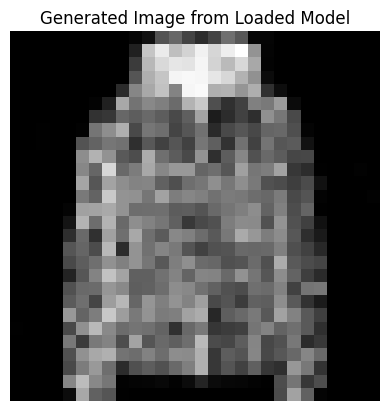

In [22]:
# Generating and displaying a sample using the loaded generator
with torch.no_grad():
    noise = torch.randn(1, 100).to(device)  # Generating random noise
    generated_image = generator(noise).cpu()

    # Unnormalize and display the generated image
    generated_image = generated_image * 0.5 + 0.5  # Convert to [0, 1] range
    plt.imshow(generated_image.squeeze(), cmap='gray')
    plt.title('Generated Image from Loaded Model')
    plt.axis('off')
    plt.show()

## STEP 6: Re-train the GAN Model

In [23]:
# Adjusting hyperparameters
num_epochs = 300  # Increase the number of epochs for re-training
smooth_real_labels = 0.9  # Label smoothing for real labels
dropout_rate = 0.2  # Adjusting dropout rate for the generator

In [24]:
# Optimizers (using slightly lower learning rates)
optimizer_g = torch.optim.Adam(generator.parameters(), lr=0.0001)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=0.0001)

Epoch [50/300], d_loss: 0.6813313961029053, g_loss: 1.967904806137085


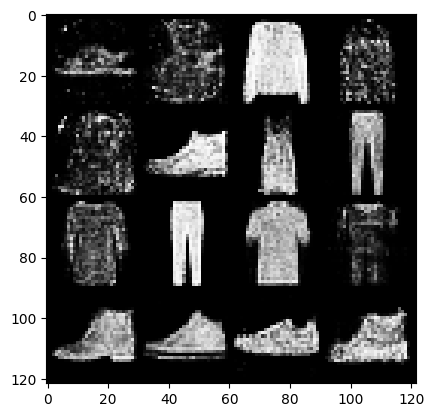

Epoch [100/300], d_loss: 0.6763636469841003, g_loss: 2.2654194831848145


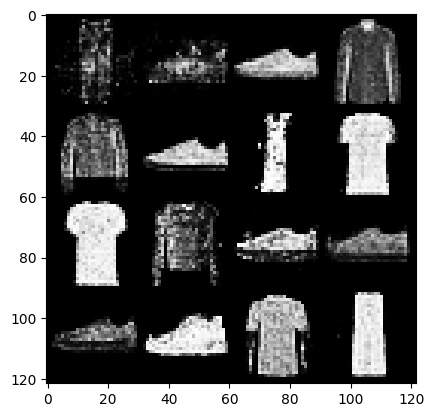

Epoch [150/300], d_loss: 0.6868250966072083, g_loss: 3.2921829223632812


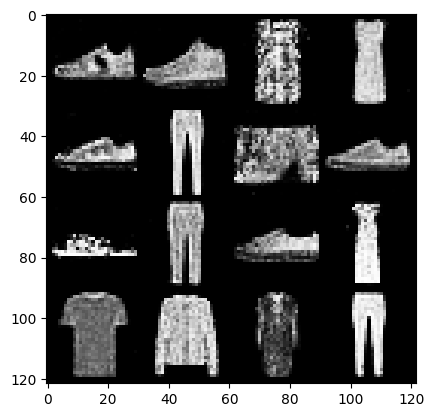

Epoch [200/300], d_loss: 0.5238097310066223, g_loss: 3.2847824096679688


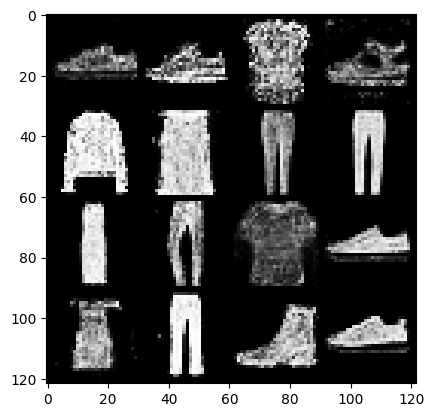

Epoch [250/300], d_loss: 0.5554453134536743, g_loss: 3.8740944862365723


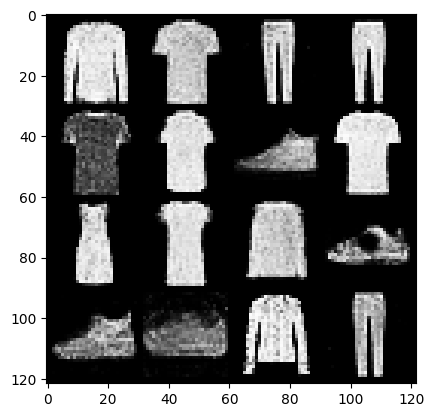

Epoch [300/300], d_loss: 0.5542432069778442, g_loss: 3.5909323692321777


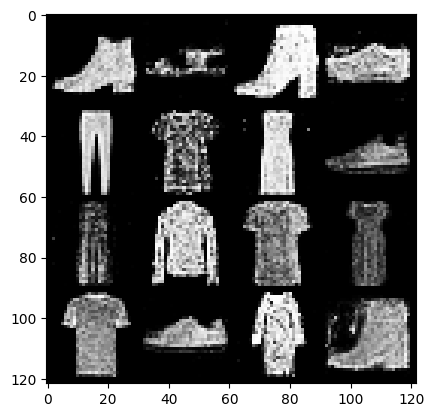

In [29]:
# Re-training loop
for epoch in range(num_epochs):
    for real_images, _ in fashion_dataloader:
        # Moving real images to the device
        real_images = real_images.to(device)

        # Labels for real and fake images (using label smoothing)
        real_labels = torch.full((real_images.size(0), 1), smooth_real_labels).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator

        outputs = discriminator(real_images)
        d_loss_real = loss_function(outputs, real_labels)

        # Generating fake images
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach())
        d_loss_fake = loss_function(outputs, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake

        # Backpropagation and optimization
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator

        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise)
        outputs = discriminator(fake_images)

        # Compute generator loss
        g_loss = loss_function(outputs, real_labels)

        # Backpropagation and optimization
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

    # Logging losses and generating sample outputs every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')
        with torch.no_grad():
            noise = torch.randn(16, 100).to(device)
            fake_images = generator(noise).cpu()
            fake_images = fake_images * 0.5 + 0.5  # Convert to [0, 1] range
            grid_img = vutils.make_grid(fake_images, nrow=4)
            plt.imshow(grid_img.permute(1, 2, 0))
            plt.show()


In [30]:
# Saving the improved model weights

torch.save(generator.state_dict(), os.path.join(model_dir, 'generator_improved.pth'))
torch.save(discriminator.state_dict(), os.path.join(model_dir, 'discriminator_improved.pth'))

print("Improved model weights saved successfully.")

Improved model weights saved successfully.


## STEP 7: Save Model Weights without Using Checkpoints

In [31]:
torch.save(generator.state_dict(), os.path.join(model_dir, 'generator_final.pth'))
torch.save(discriminator.state_dict(), os.path.join(model_dir, 'discriminator_final.pth'))

print("Final model weights saved successfully without using checkpoints.")

Final model weights saved successfully without using checkpoints.


## STEP 8: Load Model Weights without Using Checkpoints

In [32]:
# Initializing the generator and discriminator

loaded_generator = DropoutGenerator()
loaded_discriminator = DropoutDiscriminator()

In [33]:
# Loading the model weights (state_dict)

loaded_generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator_final.pth')))
loaded_discriminator.load_state_dict(torch.load(os.path.join(model_dir, 'discriminator_final.pth')))

<ipython-input-33-e7dc1c531b52>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_generator.load_state_dict(torch.load(os.path.join(model_dir, 'generator_final.pth')))

<All keys matched successfully>

In [34]:
# Moving models to the correct device (CPU or GPU)

loaded_generator.to(device)
loaded_discriminator.to(device)

DropoutDiscriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
print("Model weights loaded successfully without using checkpoints.")


I tried with 300 epochs and got a better result, but unfortunatly I completed my GPU limit and could not execute more. I am attaching the file for my improved results in the comments in the previous submission I tried with 10 epochs and stated my findings. This file is just an indication that I experimented with increasing the epochs from 10 to 100 to 300. 